# **Load and Preprocess the Data**

In [1]:
import pandas as pd

# Load the dataset
csv_file_path = '/content/E-commerce Customer Behavior - Sheet1.csv'
df = pd.read_csv(csv_file_path)

# Check for missing values
print(df.isnull().sum())

# Handle missing values (if any)
df.fillna({'Satisfaction Level': 'Neutral'}, inplace=True)

# Encode categorical variables
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Discount Applied'] = df['Discount Applied'].map({True: 1, False: 0})
df = pd.get_dummies(df, columns=['Membership Type', 'City'], drop_first=True)

# Preview the dataset
print(df.head())

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64
   Customer ID  Gender  Age  Total Spend  Items Purchased  Average Rating  \
0          101       1   29      1120.20               14             4.6   
1          102       0   34       780.50               11             4.1   
2          103       1   43       510.75                9             3.4   
3          104       0   30      1480.30               19             4.7   
4          105       0   27       720.40               13             4.0   

   Discount Applied  Days Since Last Purchase Satisfaction Level  \
0                 1                        25          Satisfied   
1                 0                        18            N

# **Exploratory Data Analysis (EDA)**

       Customer ID      Gender         Age  Total Spend  Items Purchased  \
count   350.000000  350.000000  350.000000   350.000000       350.000000   
mean    275.500000    0.500000   33.597143   845.381714        12.600000   
std     101.180532    0.500716    4.870882   362.058695         4.155984   
min     101.000000    0.000000   26.000000   410.800000         7.000000   
25%     188.250000    0.000000   30.000000   502.000000         9.000000   
50%     275.500000    0.500000   32.500000   775.200000        12.000000   
75%     362.750000    1.000000   37.000000  1160.600000        15.000000   
max     450.000000    1.000000   43.000000  1520.100000        21.000000   

       Average Rating  Discount Applied  Days Since Last Purchase  
count      350.000000        350.000000                350.000000  
mean         4.019143          0.500000                 26.588571  
std          0.580539          0.500716                 13.440813  
min          3.000000          0.000000    

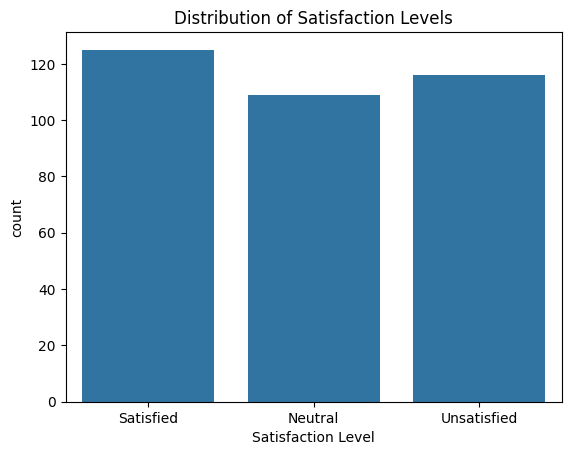

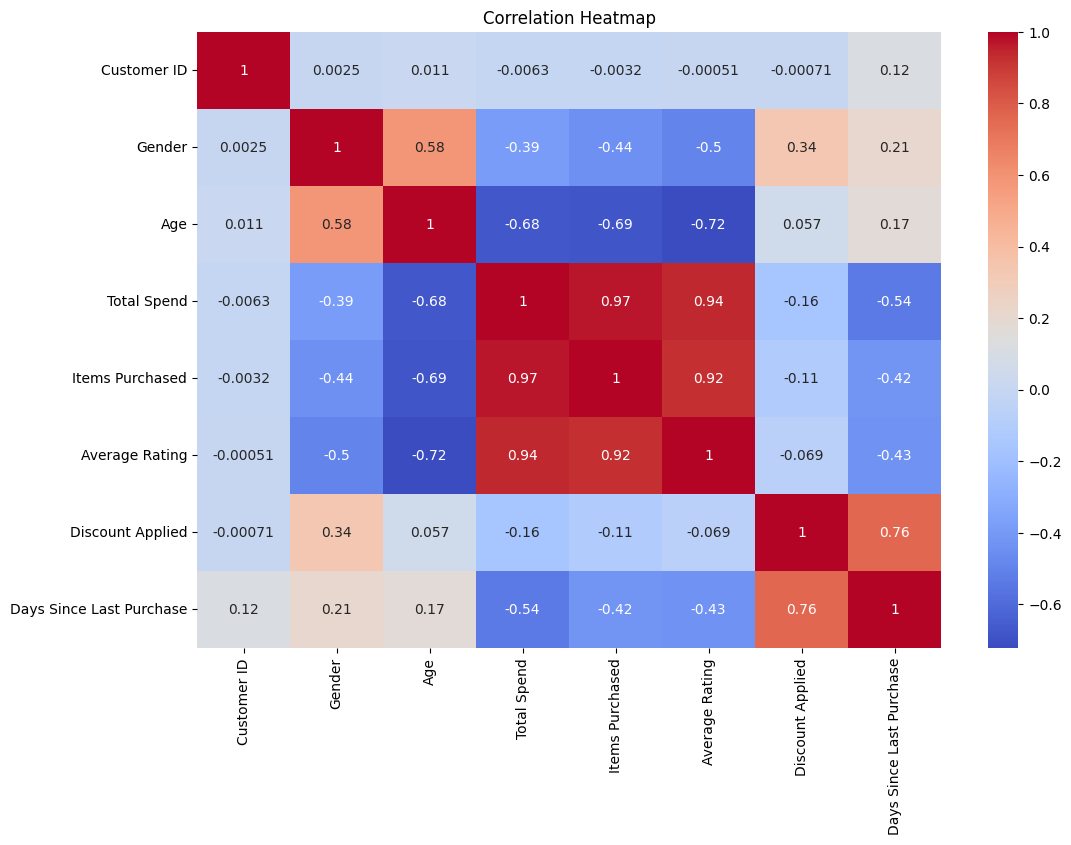

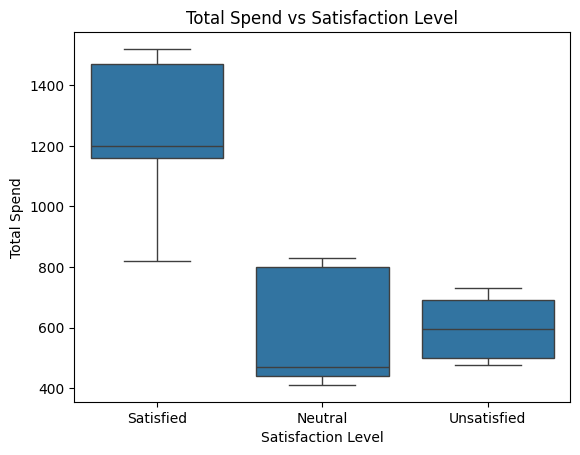

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df.describe())

# Distribution of Satisfaction Levels
sns.countplot(x='Satisfaction Level', data=df)
plt.title("Distribution of Satisfaction Levels")
plt.show()

# Select only numeric columns for correlation heatmap
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Relationship between Total Spend and Satisfaction Level
sns.boxplot(x='Satisfaction Level', y='Total Spend', data=df)
plt.title("Total Spend vs Satisfaction Level")
plt.show()

# **Apply Statistical Methods**

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Prepare the data for modeling
x = df.drop(['Satisfaction Level', 'Customer ID'], axis=1)
y = df['Satisfaction Level']

# Encode target variable
y = y.map({'Satisfied': 2, 'Neutral': 1, 'Unsatisfied': 0})

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

# Evaluate the model
predictions = model.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        29

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



# **Visualize Key Findings**

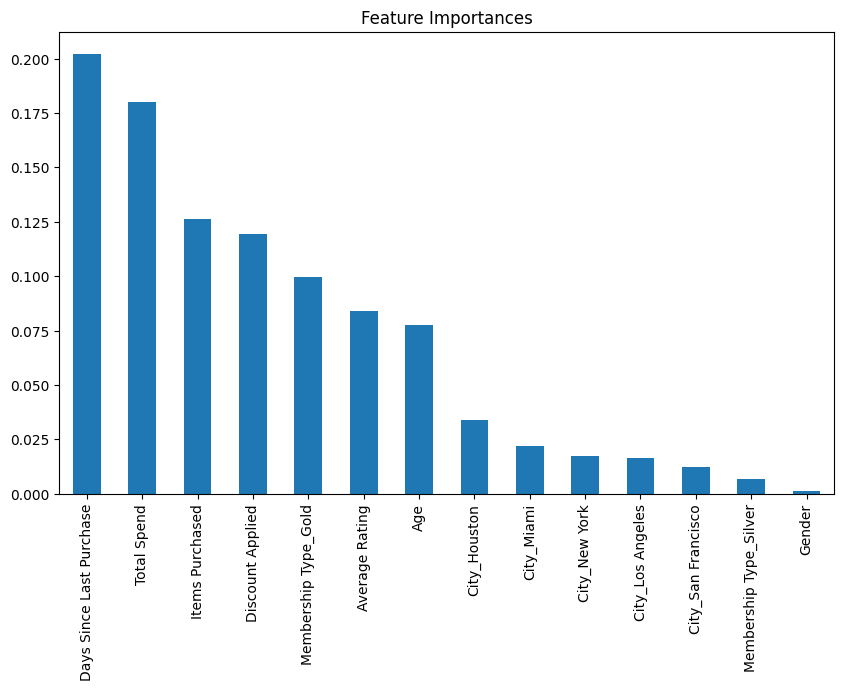

In [7]:
# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title("Feature Importances")
plt.show()